## Микишева Мария Б03-212 Задание Т4

In [16]:
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import scipy as sp

In [50]:
N = 100
THETA = 10
BETA = 0.95

# Генерация выборки

In [51]:
def generate_uniform_sample(a, b, size):

    sample = [rd.uniform(a, b) for i in range(size)]

    return np.array(sample)

In [52]:
sample = generate_uniform_sample(THETA, 2 * THETA, N)
print('sample =', sample)

sample = [12.99088113 11.67073921 12.72296568 16.33292895 11.11903398 18.23998265
 15.78736131 16.88422203 11.00810908 10.22755815 13.19844461 16.31107792
 18.63676997 13.96232535 10.45499685 16.43253825 16.03820819 16.90613838
 13.01286761 17.43002565 17.10723914 12.20942401 10.53652088 18.21205924
 11.11438809 19.12841018 17.12571784 11.87893775 10.36473683 15.20650726
 11.06753731 19.7741929  14.22290638 13.65847001 15.94926723 13.55819926
 11.33105448 19.23389413 19.82383951 12.60429259 17.33839265 12.08961338
 10.38994401 17.99974366 14.1431039  10.04899575 18.28132844 18.96879189
 10.96906254 11.98479925 16.36823952 15.99635778 16.12123529 18.08673634
 18.42354013 17.36279649 14.37490248 19.36036189 18.81562431 12.476969
 14.44068114 10.56668281 12.46634093 18.3692586  15.46553413 18.47456122
 11.80823226 18.48764365 13.67405631 12.07431088 19.12796617 11.19550653
 15.36500432 17.38696952 17.97743124 12.14450609 11.35180214 18.94010732
 11.61220376 12.97549841 19.72002994 19.2167

## Точный доверительный интервал

In [53]:
def exact_confidence_interval(sample, beta):
    x_max = np.max(sample)
    t1 = x_max / (((1+beta)/2) ** (1/np.size(sample)) + 1)
    t2 = x_max / (((1-beta)/2) ** (1/np.size(sample)) + 1)
    return t1, t2

t1, t2 = exact_confidence_interval(sample, BETA)

In [54]:
print(f'Точный доверительный интервал: {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина точного доверительного интервала: {t2-t1}')

Точный доверительный интервал: 9.913 < theta < 10.095
Длина точного доверительного интервала: 0.18154391661019353


## Асимптотический доверительный интервал (ОММ)

In [55]:
def quantiles(beta):
    u1 = 2**0.5 * sp.special.erfinv(-beta)
    u2 = -u1
    print("u1, u2:", u1,u2)
    return u1, u2

def asymptotic_confidence_interval(sample, beta):
    n = np.size(sample)
    mean = np.mean(sample)
    square_mean = np.mean(sample * sample)

    u1, u2 = quantiles(beta)
    t1 = 3/2 * u1 * ((square_mean-mean**2)/n)**0.5 + 2/3*mean
    t2 = 3/2 * u2 * ((square_mean-mean**2)/n)**0.5 + 2/3*mean
    return t1, t2


t1, t2 = asymptotic_confidence_interval(sample, BETA)

u1, u2: -1.959963984540054 1.959963984540054


In [56]:
print(f'Асимптотический довертельный интервал: {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина асимптотического доверительного интервала: {t2-t1}')

Асимптотический довертельный интервал: 9.112 < theta < 10.909
Длина асимптотического доверительного интервала: 1.7968470256031743


## Бутстраповский непараметрический доверительный интервал

In [60]:
def bootstrap_confidence_interval(sample, beta):
    theta = 2/3*np.mean(sample)
    deltas = []
    for i in range(1000):
        sample_i = np.random.choice(sample, size=np.size(sample))
        deltas.append(2/3*np.mean(sample_i) - theta)
    deltas = np.sort(deltas)
    k1 = int((1+beta)/2 * 1000)
    k2 = int((1-beta)/2 * 1000)
    t1 = theta - deltas[k1]
    t2 = theta - deltas[k2]
    return t1, t2

t1, t2 = bootstrap_confidence_interval(sample, BETA)

In [61]:
print(f'Бутстраповский доверительный интервал {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина бутстраповского доверительного интервала: {t2-t1}')

Бутстраповский доверительный интервал 9.599 < theta < 10.403
Длина бутстраповского доверительного интервала: 0.8039949117598599


## Бутстраповский параметрический доверительный интервал

In [62]:
def bootstrap_param_confidence_interval(sample, beta):
    theta = 2/3*np.mean(sample)
    thetas = []
    for i in range(1000):
        sample_i = np.random.choice(sample, size=np.size(sample))
        thetas.append(2/3*np.mean(sample_i))
    k1 = int((1-beta)/2 * 1000)
    k2 = int((1+beta)/2 * 1000)
    thetas = np.sort(thetas)
    t1 = thetas[k1]
    t2 = thetas[k2]
    return t1, t2

t1, t2 = bootstrap_param_confidence_interval(sample, BETA)

In [63]:
print(f'Бутстраповский параметрический доверительный интервал {round(t1, 3)} < theta < {round(t2, 3)}')
print(f'Длина бутстраповского параметрического доверительного интервала: {t2-t1}')

Бутстраповский параметрический доверительный интервал 9.606 < theta < 10.417
Длина бутстраповского параметрического доверительного интервала: 0.8111438514494242


## Сранение

u1, u2: -1.959963984540054 1.959963984540054


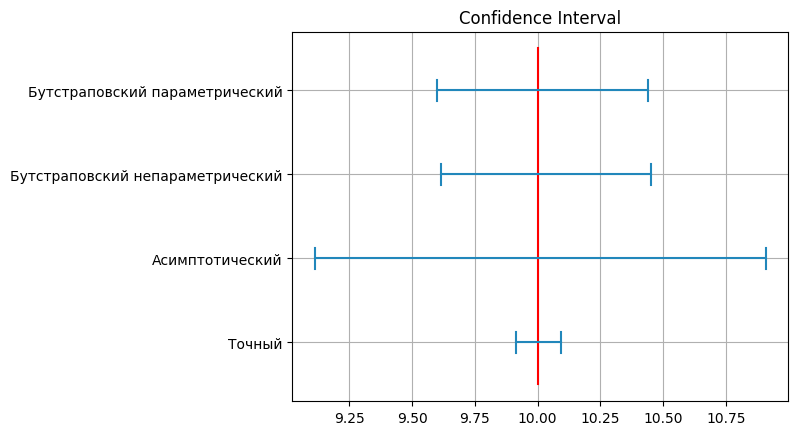

In [64]:
import matplotlib.pyplot as plt

def plot_confidence_interval(num, sample, beta, eval_func, color='#2187bb', vertical_line_width=0.25):
    t1, t2 = eval_func(sample, beta)
    plt.plot([t1, t2], [num, num], color=color)
    plt.plot([t1, t1], [num-vertical_line_width/2, num+vertical_line_width/2], color=color)
    plt.plot([t2, t2], [num-vertical_line_width/2, num+vertical_line_width/2], color=color)
    return

plt.yticks([1, 2, 3, 4], ['Точный', 'Асимптотический', 'Бутстраповский непараметрический', 'Бутстраповский параметрический'])
plt.title('Confidence Interval')
plt.plot([THETA, THETA], [0.5, 4.5], color='red')
plot_confidence_interval(1, sample, BETA, exact_confidence_interval)
plot_confidence_interval(2, sample, BETA, asymptotic_confidence_interval)
plot_confidence_interval(3, sample, BETA, bootstrap_confidence_interval)
plot_confidence_interval(4, sample, BETA, bootstrap_param_confidence_interval)
plt.grid()
plt.show()